<a href="https://colab.research.google.com/github/justin-hsieh/DS-Unit-2-Applied-Modeling/blob/master/assignment_applied_modeling_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Applied Modeling, Module 2

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Plot the distribution of your target. 
    - Regression problem: Is your target skewed? Then, log-transform it.
    - Classification: Are your classes imbalanced? Then, don't use just accuracy. And try `class_balance` parameter in scikit-learn.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline?
- [ ] Share at least 1 visualization on Slack.

You need to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.


## Reading

### Today
- [imbalance-learn](https://github.com/scikit-learn-contrib/imbalanced-learn)
- [Learning from Imbalanced Classes](https://www.svds.com/tbt-learning-imbalanced-classes/)
- [Machine Learning Meets Economics](http://blog.mldb.ai/blog/posts/2016/01/ml-meets-economics/)
- [ROC curves and Area Under the Curve explained](https://www.dataschool.io/roc-curves-and-auc-explained/)
- [The philosophical argument for using ROC curves](https://lukeoakdenrayner.wordpress.com/2018/01/07/the-philosophical-argument-for-using-roc-curves/)


### Yesterday
- [Attacking discrimination with smarter machine learning](https://research.google.com/bigpicture/attacking-discrimination-in-ml/), by Google Research, with  interactive visualizations. _"A threshold classifier essentially makes a yes/no decision, putting things in one category or another. We look at how these classifiers work, ways they can potentially be unfair, and how you might turn an unfair classifier into a fairer one. As an illustrative example, we focus on loan granting scenarios where a bank may grant or deny a loan based on a single, automatically computed number such as a credit score."_
- [How Shopify Capital Uses Quantile Regression To Help Merchants Succeed](https://engineering.shopify.com/blogs/engineering/how-shopify-uses-machine-learning-to-help-our-merchants-grow-their-business)
- [Maximizing Scarce Maintenance Resources with Data: Applying predictive modeling, precision at k, and clustering to optimize impact](https://towardsdatascience.com/maximizing-scarce-maintenance-resources-with-data-8f3491133050), **by Lambda DS3 student** Michael Brady. His blog post extends the Tanzania Waterpumps scenario, far beyond what's in the lecture notebook.
- [Notebook about how to calculate expected value from a confusion matrix by treating it as a cost-benefit matrix](https://github.com/podopie/DAT18NYC/blob/master/classes/13-expected_value_cost_benefit_analysis.ipynb)
- [Simple guide to confusion matrix terminology](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) by Kevin Markham, with video
- [Visualizing Machine Learning Thresholds to Make Better Business Decisions](https://blog.insightdatascience.com/visualizing-machine-learning-thresholds-to-make-better-business-decisions-4ab07f823415)






In [0]:
import pandas as pd
import seaborn as sns
#import plotly.express as px
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
#import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

In [9]:
df = pd.read_csv('/content/openpowerlifting.csv')
drops = ['Squat4Kg', 'Bench4Kg', 'Deadlift4Kg','Country','Place','Squat1Kg',
        'Squat2Kg','Squat3Kg','Bench1Kg','Bench2Kg','Bench3Kg','Deadlift1Kg',
        'Deadlift2Kg','Deadlift3Kg']
df = df.drop(columns=drops)
df.dropna(inplace=True)
df.shape

(36992, 23)

In [11]:
X = df.drop(columns='Best3SquatKg')
y = df['Best3SquatKg']

Xtrain, X_test, ytrain,y_test = train_test_split(X,y, test_size=0.40,  
                              random_state=42)

X_train, X_val, y_train,y_val = train_test_split(Xtrain,ytrain, test_size=0.25,
                              random_state=42)

X_train.shape, X_test.shape, X_val.shape

((16646, 22), (14797, 22), (5549, 22))

In [12]:
model = LinearRegression()

features = ['Sex','Equipment','Age','BodyweightKg','Best3BenchKg','Best3DeadliftKg']

X = X_train[features].replace({'M':0,'F':1,'Raw':2,'Single-ply':3,
                              'Wraps':4,'Multi-ply':5})
y = y_train

model.fit(X,y)

y_pred = model.predict(X_val[features].replace({'M':0,'F':1,'Raw':2,'Single-ply':3,
                              'Wraps':4,'Multi-ply':5}))
print('Validation Accuracy', r2_score(y_pred, y_val))
print('Mean Absolute Error:', mean_absolute_error(y_val, y_pred)) 

Validation Accuracy 0.8523288497456892
Mean Absolute Error: 16.220872523786927


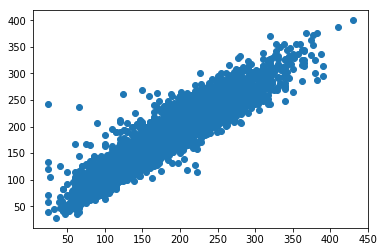

In [13]:
plt.scatter(y_val, y_pred)
plt.show()